In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
import tensorflow

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

In [2]:
# Read in csv (already transformed)
hosp_df = pd.read_csv('..//..//data/hospitals/LA_Ed_MergedwithHosp19.csv')
# Fill the null columns where all values are null
hosp_df = hosp_df.fillna(" ")
hosp_df

,oshpd_id,facility_name,control_type_desc,DBA_ADDRESS1,DBA_CITY,DBA_ZIP_CODE,licensed_bed_size,Sex_Female,Sex_Male,Age_01_09,...,DX_Births,ED_Visit,All_Other_Languages,English,Spanish,LATITUDE,LONGITUDE,Target,Label,SPA
0,106190017,ALHAMBRA HOSPITAL MEDICAL CENTER,Investor - Individual,100 SOUTH RAYMOND AVENUE,ALHAMBRA,91801,100-149,9120,6972,1375,...,,16093,1493,12664,1936,34.089880,-118.144900,0.830526,False,3
1,106190034,ANTELOPE VALLEY HOSPITAL,District,1600 WEST AVENUE J,LANCASTER,93534,300-499,65991,48013,15547,...,1,114007,642,101899,11466,34.687800,-118.157981,0.896830,True,7
2,106190045,CATALINA ISLAND MEDICAL CENTER,Non-profit Corporation (incl. Church-related),100 FALLS CANYON ROAD,AVALON,90704,100-149,1120,1016,209,...,,2136,22,1419,695,33.338870,-118.333690,0.996493,True,8
3,106190053,ST. MARY MEDICAL CENTER - LONG BEACH,Non-profit Corporation (incl. Church-related),1050 LINDEN AVENUE,LONG BEACH,90813,300-499,24414,22547,4426,...,1,46973,251,39420,7302,33.780238,-118.186641,0.914446,True,8
4,106190081,BEVERLY HOSPITAL,Non-profit Corporation (incl. Church-related),309 WEST BEVERLY BOULEVARD,MONTEBELLO,90640,200-299,15810,13452,3770,...,,29262,296,23196,5770,34.016140,-118.101320,0.779400,False,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,106191231,LOS ANGELES COUNTY OLIVE VIEW-UCLA MEDICAL CENTER,City or County,14445 OLIVE VIEW DRIVE,SYLMAR,91342,300-499,30669,30562,2684,...,,61235,1621,29815,29799,34.324180,-118.452550,0.856124,False,2
65,106191450,KAISER FOUNDATION HOSPITAL - WOODLAND HILLS,Non-profit Corporation (incl. Church-related),5601 DE SOTO AVENUE,WOODLAND HILLS,91367,200-299,21729,18861,2886,...,,40591,999,37100,2492,34.171980,-118.588290,0.927437,True,2
66,106196035,KAISER FOUNDATION HOSPITAL - BALDWIN PARK,Non-profit Corporation (incl. Church-related),1011 BALDWIN PARK BLVD.,BALDWIN PARK,91706,200-299,40876,33868,8536,...,,74748,1630,61533,11585,34.063480,-117.986000,0.938931,True,3
67,106196403,KAISER FOUNDATION HOSPITAL - DOWNEY,Non-profit Corporation (incl. Church-related),9333 IMPERIAL HIGHWAY,DOWNEY,90242,300-499,55056,42398,11202,...,,97457,885,80346,16226,33.917123,-118.129022,0.923741,True,7


In [3]:
print(hosp_df.shape)

(69, 65)


In [4]:
# Set features. This will also be used as your x values.
selected_features = hosp_df.iloc[:, 7:62]
print(selected_features.shape)

(69, 55)


In [5]:
selected_features

,Sex_Female,Sex_Male,Age_01_09,Age_10_19,Age_20_29,Age_30_39,Age_40_49,Age_50_59,Age_60_69,Age_70_79,...,DX_Respiratory_System,DX_Skin_Disorders,DX_Symptoms,DX_Births,ED_Visit,All_Other_Languages,English,Spanish,LATITUDE,LONGITUDE
0,9120,6972,1375,1514,2882,2409,2043,2274,1541,947,...,1908,672,3391,,16093,1493,12664,1936,34.089880,-118.144900
1,65991,48013,15547,12697,20538,17888,13452,13661,9176,4484,...,14634,3786,24751,1,114007,642,101899,11466,34.687800,-118.157981
2,1120,1016,209,279,320,279,234,269,259,125,...,182,102,357,,2136,22,1419,695,33.338870,-118.333690
3,24414,22547,4426,3669,8981,8241,6589,6753,4369,1881,...,5478,2406,9689,1,46973,251,39420,7302,33.780238,-118.186641
4,15810,13452,3770,3147,5239,4326,3551,3289,2267,1588,...,2575,1089,7635,,29262,296,23196,5770,34.016140,-118.101320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,30669,30562,2684,4270,9556,10759,11547,11783,7177,2006,...,2951,2333,19557,,61235,1621,29815,29799,34.324180,-118.452550
65,21729,18861,2886,2918,5343,4330,3999,4854,5020,5033,...,3454,1178,10325,,40591,999,37100,2492,34.171980,-118.588290
66,40876,33868,8536,7304,10398,8699,8221,8453,7916,7503,...,7487,2622,18048,,74748,1630,61533,11585,34.063480,-117.986000
67,55056,42398,11202,8601,14917,13023,11444,10920,10286,8077,...,8977,3295,28388,,97457,885,80346,16226,33.917123,-118.129022


In [6]:
X = selected_features
y = hosp_df["Label"]
# y = df["Target"].values.reshape(-1, 1)
print(X.shape, y.shape)

(69, 55) (69,)


In [7]:
data = X.copy()

X = pd.get_dummies(data)
X.head()

,Sex_Female,Sex_Male,Age_01_09,Age_10_19,Age_20_29,Age_30_39,Age_40_49,Age_50_59,Age_60_69,Age_70_79,...,All_Other_Languages_2065.0,All_Other_Languages_2510.0,All_Other_Languages_2702.0,All_Other_Languages_2707.0,All_Other_Languages_2913.0,All_Other_Languages_2985.0,All_Other_Languages_4743.0,All_Other_Languages_5545.0,All_Other_Languages_5875.0,All_Other_Languages_
0,9120,6972,1375,1514,2882,2409,2043,2274,1541,947,...,0,0,0,0,0,0,0,0,0,0
1,65991,48013,15547,12697,20538,17888,13452,13661,9176,4484,...,0,0,0,0,0,0,0,0,0,0
2,1120,1016,209,279,320,279,234,269,259,125,...,0,0,0,0,0,0,0,0,0,0
3,24414,22547,4426,3669,8981,8241,6589,6753,4369,1881,...,0,0,0,0,0,0,0,0,0,0
4,15810,13452,3770,3147,5239,4326,3551,3289,2267,1588,...,0,0,0,0,0,0,0,0,0,0


In [8]:
pd.set_option('max_columns', None)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Sex_Female,Sex_Male,Age_01_09,Age_10_19,Age_20_29,Age_30_39,Age_40_49,Age_50_59,Age_60_69,Age_70_79,Age_80_,Age_Under_1,HispanicorLatino,NonHis,Acute_Care,Routine,Medicare,Other_Payer,DX_All_Pregnancies,DX_Blood_Disorders,DX_Cancer,DX_Circulatory_System,DX_Digestive_System,DX_Ear_Disorders,DX_Endocrine_Diseases,DX_Eye_Disorders,DX_Genitourinary_System,DX_Infections,DX_Injuries_Poisonings,DX_Mental_Disorders,DX_Musculoskeletal_System,DX_Nervous_System,DX_Other_Reasons,DX_Respiratory_System,DX_Skin_Disorders,DX_Symptoms,ED_Visit,English,Spanish,LATITUDE,LONGITUDE,Unknown_Eth_1.0,Unknown_Eth_2.0,Unknown_Eth_4.0,Unknown_Eth_5.0,Unknown_Eth_8.0,Unknown_Eth_20.0,Unknown_Eth_22.0,Unknown_Eth_35.0,Unknown_Eth_40.0,Unknown_Eth_41.0,Unknown_Eth_42.0,Unknown_Eth_48.0,Unknown_Eth_49.0,Unknown_Eth_59.0,Unknown_Eth_62.0,Unknown_Eth_72.0,Unknown_Eth_74.0,Unknown_Eth_80.0,Unknown_Eth_83.0,Unknown_Eth_103.0,Unknown_Eth_113.0,Unknown_Eth_121.0,Unknown_Eth_127.0,Unknown_Eth_132.0,Unknown_Eth_153.0,Unknown_Eth_156.0,Unknown_Eth_204.0,Unknown_Eth_210.0,Unknown_Eth_251.0,Unknown_Eth_290.0,Unknown_Eth_304.0,Unknown_Eth_313.0,Unknown_Eth_320.0,Unknown_Eth_331.0,Unknown_Eth_360.0,Unknown_Eth_368.0,Unknown_Eth_436.0,Unknown_Eth_437.0,Unknown_Eth_438.0,Unknown_Eth_459.0,Unknown_Eth_468.0,Unknown_Eth_470.0,Unknown_Eth_510.0,Unknown_Eth_514.0,Unknown_Eth_523.0,Unknown_Eth_555.0,Unknown_Eth_620.0,Unknown_Eth_622.0,Unknown_Eth_669.0,Unknown_Eth_706.0,Unknown_Eth_785.0,Unknown_Eth_787.0,Unknown_Eth_828.0,Unknown_Eth_829.0,Unknown_Eth_992.0,Unknown_Eth_1104.0,Unknown_Eth_1128.0,Unknown_Eth_1155.0,Unknown_Eth_1173.0,Unknown_Eth_1284.0,Unknown_Eth_1446.0,Unknown_Eth_1735.0,Unknown_Eth_1816.0,Unknown_Eth_1980.0,Unknown_Eth_2114.0,Unknown_Eth_2294.0,Unknown_Eth_3018.0,Unknown_Eth_4080.0,Unknown_Eth_,Against_Medical_Advice_8.0,Against_Medical_Advice_224.0,Against_Medical_Advice_230.0,Against_Medical_Advice_291.0,Against_Medical_Advice_301.0,Against_Medical_Advice_317.0,Against_Medical_Advice_326.0,Against_Medical_Advice_353.0,Against_Medical_Advice_367.0,Against_Medical_Advice_375.0,Against_Medical_Advice_393.0,Against_Medical_Advice_395.0,Against_Medical_Advice_413.0,Against_Medical_Advice_416.0,Against_Medical_Advice_418.0,Against_Medical_Advice_437.0,Against_Medical_Advice_444.0,Against_Medical_Advice_454.0,Against_Medical_Advice_455.0,Against_Medical_Advice_470.0,Against_Medical_Advice_485.0,Against_Medical_Advice_527.0,Against_Medical_Advice_593.0,Against_Medical_Advice_613.0,Against_Medical_Advice_622.0,Against_Medical_Advice_631.0,Against_Medical_Advice_646.0,Against_Medical_Advice_672.0,Against_Medical_Advice_682.0,Against_Medical_Advice_793.0,Against_Medical_Advice_799.0,Against_Medical_Advice_829.0,Against_Medical_Advice_841.0,Against_Medical_Advice_846.0,Against_Medical_Advice_879.0,Against_Medical_Advice_910.0,Against_Medical_Advice_980.0,Against_Medical_Advice_996.0,Against_Medical_Advice_1010.0,Against_Medical_Advice_1165.0,Against_Medical_Advice_1193.0,Against_Medical_Advice_1322.0,Against_Medical_Advice_1339.0,Against_Medical_Advice_1423.0,Against_Medical_Advice_1427.0,Against_Medical_Advice_1452.0,Against_Medical_Advice_1461.0,Against_Medical_Advice_1479.0,Against_Medical_Advice_1559.0,Against_Medical_Advice_1672.0,Against_Medical_Advice_1695.0,Against_Medical_Advice_1792.0,Against_Medical_Advice_1936.0,Against_Medical_Advice_1998.0,Against_Medical_Advice_2084.0,Against_Medical_Advice_2255.0,Against_Medical_Advice_2351.0,Against_Medical_Advice_2650.0,Against_Medical_Advice_2770.0,Against_Medical_Advice_3135.0,Against_Medical_Advice_3479.0,Against_Medical_Advice_3576.0,Against_Medical_Advice_3617.0,Against_Medical_Advice_3907.0,Against_Medical_Advice_5021.0,Against_Medical_Advice_5085.0,Against_Medical_Advice_,Died_1.0,Died_2.0,Died_4.0,Died_5.0,Died_7.0,Died_8.0,Died_12.0,Died_14.0,Died_16.0,Died_17.0,Died_18.0,Died_20.0,Died_22.0,Died_24.0,Died_25.0,Died_26.0,Died_27.0,Died_29.0,Died_32.0,Died_36.0,Died_38.0,Died_40.0,Died_42.0,Died_43.0,Died_44

In [10]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [11]:
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [12]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=743))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
tensorflow.keras.metrics.CategoricalAccuracy(
    name='categorical_accuracy', dtype=None
)

In [16]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tensorflow.keras.metrics.CategoricalAccuracy()])
#               metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               74400     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 94,802
Trainable params: 94,802
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    validation_data=(X_test_scaled, y_test_categorical),
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 51 samples, validate on 18 samples
Epoch 1/100
51/51 - 1s - loss: 0.6899 - categorical_accuracy: 0.5686 - val_loss: 0.6666 - val_categorical_accuracy: 0.6667
Epoch 2/100
51/51 - 0s - loss: 0.6358 - categorical_accuracy: 0.6078 - val_loss: 0.6553 - val_categorical_accuracy: 0.6667
Epoch 3/100
51/51 - 0s - loss: 0.5959 - categorical_accuracy: 0.6275 - val_loss: 0.6462 - val_categorical_accuracy: 0.6667
Epoch 4/100
51/51 - 0s - loss: 0.5542 - categorical_accuracy: 0.6275 - val_loss: 0.6395 - val_categorical_accuracy: 0.6667
Epoch 5/100
51/51 - 0s - loss: 0.5085 - categorical_accuracy: 0.6863 - val_loss: 0.6341 - val_categorical_accuracy: 0.6667
Epoch 6/100
51/51 - 0s - loss: 0.4580 - categorical_accuracy: 0.8039 - val_loss: 0.6288 - val_categorical_accuracy: 0.6667
Epoch 7/100
51/51 - 0s - loss: 0.4028 - categorical_accuracy: 0.9608 - val_loss: 0.6228 - val_categorical_accuracy: 0.6667
Epoch 8/100
51/51 - 0s - loss: 0.3435 - categorical_accuracy: 0.9804 - val_loss: 0.6150 - val_c

In [19]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=3)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.9175177812576294, Accuracy: 0.6666666865348816


In [20]:
# Create the SVC Model
from sklearn.svm import SVC 
model2 = SVC(kernel='linear')
model2.fit(X_train_scaled, y_train)

# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model2, param_grid, verbose=3)

In [21]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.636, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.900, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.400, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.600, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.600, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.636, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=10, gamma=0.001, score=0.600, total=   0.0s
[CV] C=10, gamma=0.005 ...............................................
[CV] ................... C=10, gamma=0.005, score=0.636, total=   0.0s
[CV] C=10, gamma=0.005 ...............................................
[CV] ................... C=10, gamma=0.005, score=0.900, total=   0.0s
[CV] C=10, gamma=0.005 ...............................................
[CV] ................... C=10, gamma=0.005, score=0.400, total=   0.0s
[CV] C=10, gamma=0.005 ...............................................
[CV] ................... C=10, gamma=0.005, score=0.600, total=   0.0s
[CV] C=10, gamma=0.005 ...............................................
[CV] ................... C=10, gamma=0.005, score=0.600, total=   0.0s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.636, total=   0.0s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [22]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001}
0.6272727272727273


In [43]:
correlations_df = hosp_df[["Sex_Female","Sex_Male","Age_10_19","Age_20_29","Age_30_39","Age_40_49","Age_50_59","Age_60_69","Age_70_79","English", "Spanish","HispanicorLatino","NonHis","Acute_Care","Routine","Medicare","Other_Payer","DX_All_Pregnancies","DX_Blood_Disorders","DX_Cancer","DX_Circulatory_System","DX_Digestive_System","DX_Ear_Disorders","DX_Endocrine_Diseases","DX_Eye_Disorders","DX_Genitourinary_System","DX_Infections","DX_Injuries_Poisonings","DX_Mental_Disorders","DX_Musculoskeletal_System","DX_Nervous_System","DX_Respiratory_System","DX_Skin_Disorders", "Target"]].astype(float)

Text(158.09375, 0.5, 'Emergency Room Patient Atrributes')

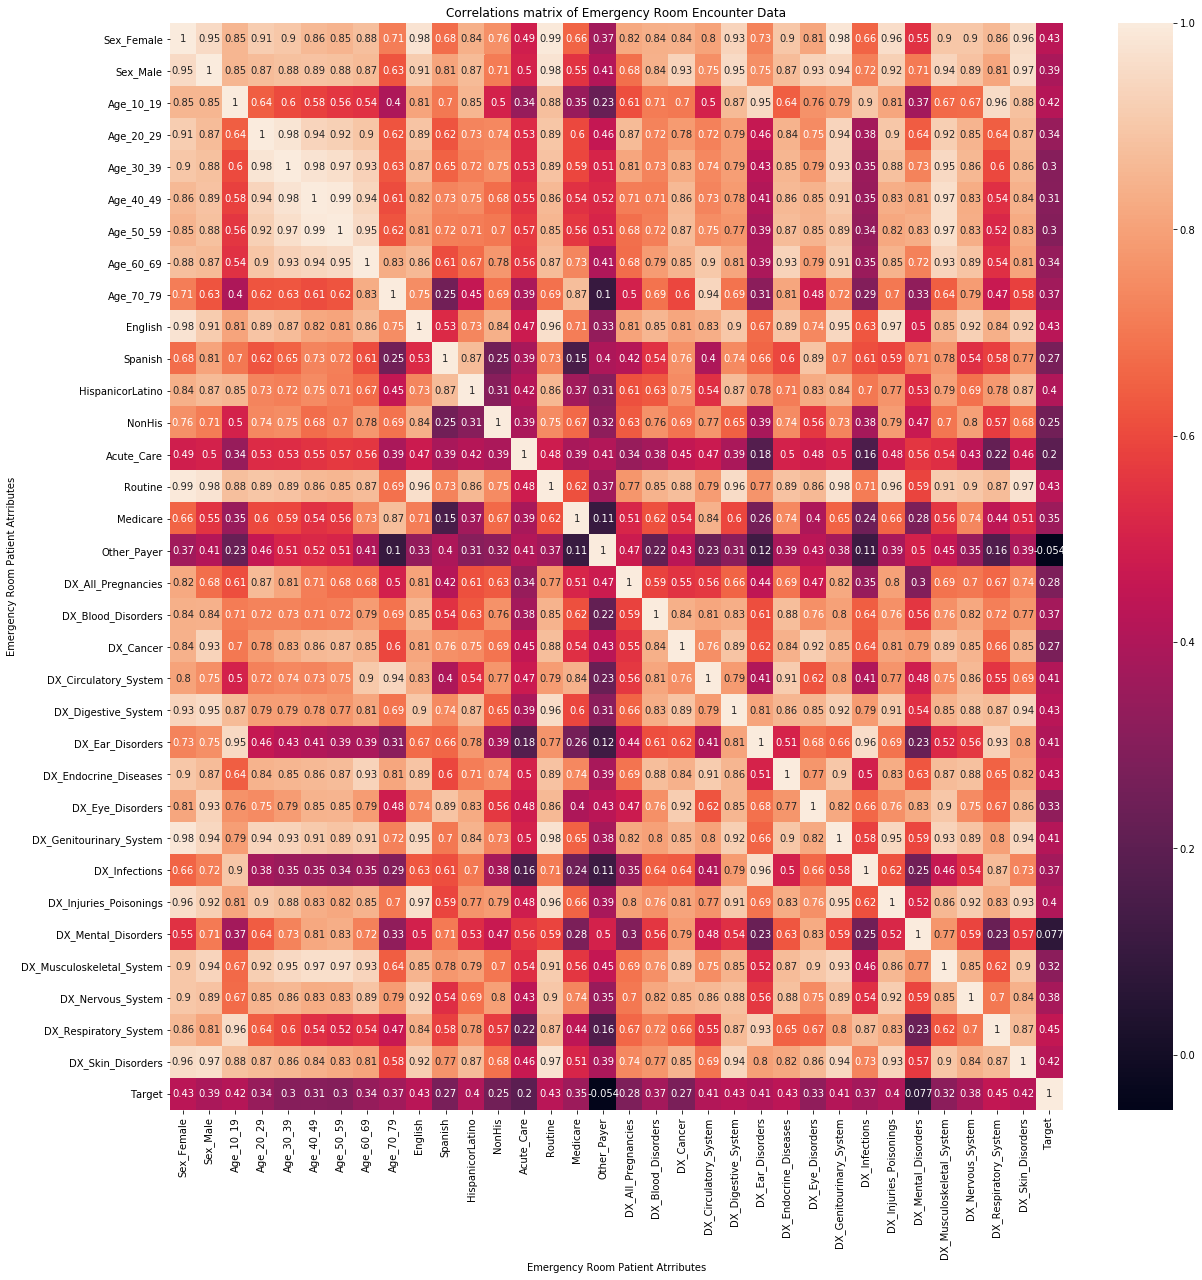

In [44]:
correlations = correlations_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)
plt.title("Correlations matrix of Emergency Room Encounter Data")
plt.xlabel("Emergency Room Patient Atrributes")
plt.ylabel("Emergency Room Patient Atrributes")

In [45]:
#Sorting the matrix
corr_pairs=correlations.unstack()
#print(corr_pairs)

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

Other_Payer                Target                      -0.053670
Target                     Other_Payer                 -0.053670
DX_Mental_Disorders        Target                       0.077247
Target                     DX_Mental_Disorders          0.077247
Age_70_79                  Other_Payer                  0.100141
                                                          ...   
DX_Mental_Disorders        DX_Mental_Disorders          1.000000
DX_Musculoskeletal_System  DX_Musculoskeletal_System    1.000000
DX_Nervous_System          DX_Nervous_System            1.000000
Other_Payer                Other_Payer                  1.000000
Target                     Target                       1.000000
Length: 1156, dtype: float64


In [51]:
#select the strong correlation pairs
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.9]

print(strong_pairs)

DX_Digestive_System        English                      0.900691
English                    DX_Digestive_System          0.900691
Routine                    DX_Nervous_System            0.900839
DX_Nervous_System          Routine                      0.900839
DX_Endocrine_Diseases      DX_Genitourinary_System      0.900992
                                                          ...   
DX_Mental_Disorders        DX_Mental_Disorders          1.000000
DX_Musculoskeletal_System  DX_Musculoskeletal_System    1.000000
DX_Nervous_System          DX_Nervous_System            1.000000
Other_Payer                Other_Payer                  1.000000
Target                     Target                       1.000000
Length: 168, dtype: float64


In [53]:
strong_df=pd.DataFrame(strong_pairs)
sorted_df=strong_df.sort_values([0])
#sorted_df=sorted_df.rename(columns= "0": "Correlation Coefficient"})
sorted_df = sorted_df.drop(sorted_df[sorted_df[0] ==1.000000 ].index)
sorted_df.head(60)

,,0
DX_Digestive_System,English,0.900691
English,DX_Digestive_System,0.900691
Routine,DX_Nervous_System,0.900839
DX_Nervous_System,Routine,0.900839
DX_Endocrine_Diseases,DX_Genitourinary_System,0.900992
DX_Genitourinary_System,DX_Endocrine_Diseases,0.900992
DX_Musculoskeletal_System,Sex_Female,0.901114
Sex_Female,DX_Musculoskeletal_System,0.901114
DX_Injuries_Poisonings,Age_20_29,0.901146
Age_20_29,DX_Injuries_Poisonings,0.901146


In [54]:
#save to csv
sorted_df.to_csv('coefficient.csv')
sorted_df.to_csv(r'C:Users\Sonia Gupta\iCloud Drive\Desktop\coefficient.csv', index = None)
